<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 3 - Floyd-Warshall, Cicles, Camins i Circuits Eulerians</h2>
</center>
</div>

In [404]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Cicles

Donat un graf $G$, un __cicle__ és un conjunt de nodes de $G$ connectats per arestes formant una cadena tancada:

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Undirected_6_cycle.svg" alt="Cicle" />

<div class="alert alert-success">
<h1>Problema 1</h1>
<p>
    Implementeu un algorisme per a detectar si un graf conté, com a mínim, un cicle. <br>
    Per a facilitar lleugerament el problema, suposarem que el graf és <b>no dirigit</b> i té només <b>una component connexa</b>.
</p>    
        
</div>

In [405]:
import networkx as nx
from matplotlib import pyplot as plt


def cycles_r(G, prev, current, visited):

    if current in visited:
        return True
    
    else:
        visited.add(current)

        # Veo todos los vecinos actuales y distinto del anterior.
        # Si existen, recurso sobre ellos.
        for nei in G.neighbors(current):
            if nei != prev:
                prev = current
                return cycles_r(G, prev, nei, visited)
            
    return False



def cycles(G):
    """
    Comprova si un graf té cicles
    
    Params
    ======
    :G: Un objecte de la classe nx.Graph
    
    Returns
    =======
    :b: Un boleà True/False indicant si el graf G té o no cicles.
    """

    visited = set()
    n = list(G.nodes())[0]
    
    
    b = cycles_r(G, n, n, visited)
    return b

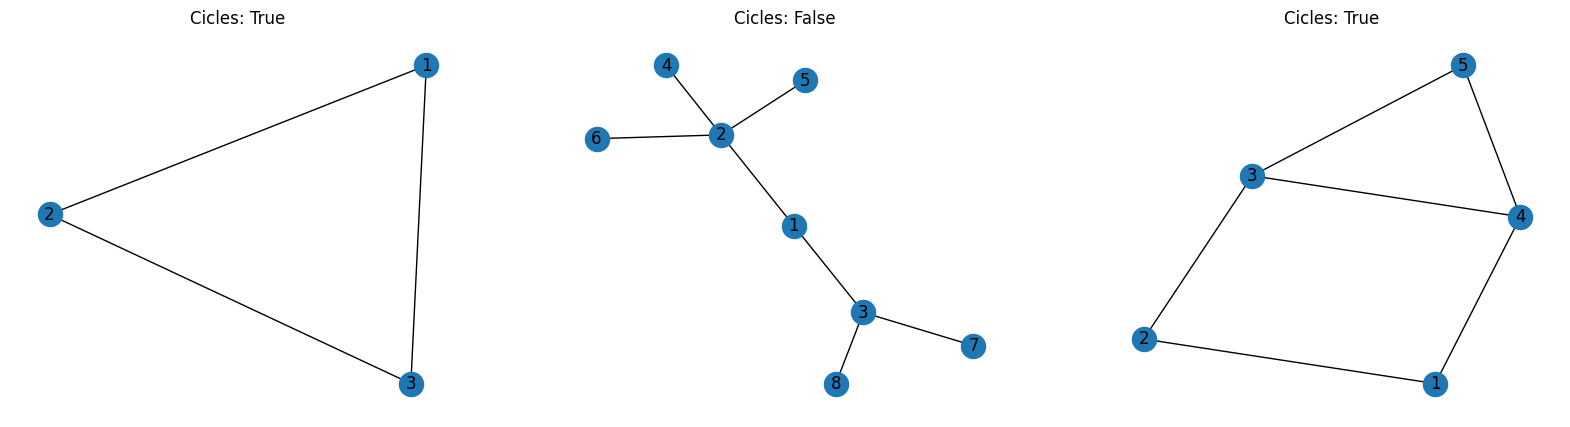

In [406]:
G1 = nx.Graph()
G1.add_edges_from(((1,2), (2,3), (3,1)))

G2 = nx.Graph()
G2.add_edges_from(((1,2), (1,3), (2,4), (2,5), (2,6), (3,7), (3,8)))

G3 = nx.Graph()
G3.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3), (4,5), (3,5)))

fig, axs = plt.subplots(1,3,figsize=(20,5))
nx.draw(G1, with_labels=True, ax=axs[0])
axs[0].set_title(f'Cicles: {cycles(G1)}')

nx.draw(G2, with_labels=True, ax=axs[1])
axs[1].set_title(f'Cicles: {cycles(G2)}')

nx.draw(G3, with_labels=True, ax=axs[2])
axs[2].set_title(f'Cicles: {cycles(G3)}')

plt.show()

## Recordatori: Camís més curts entre totes les parelles de nodes. Algorisme Floyd-Warshall

Suposeu que tenim el següent graf:

In [407]:
from digraph_plot import my_draw_networkx_edge_labels
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

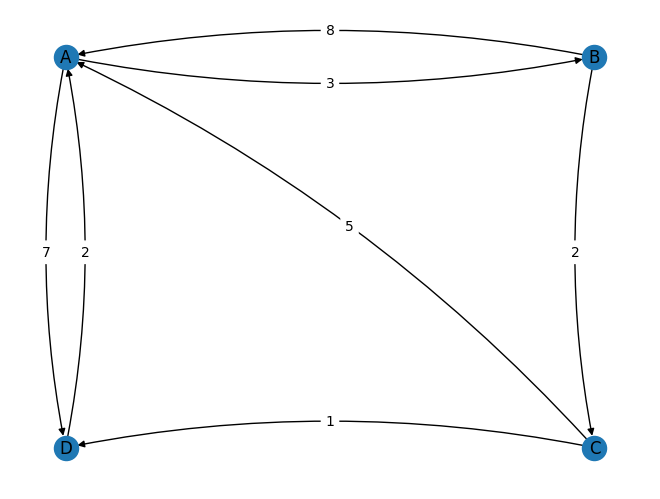

In [408]:
G = nx.DiGraph()
G.add_weighted_edges_from((('A','B',3), ('A','D',7), ('B','A',8), ('B','C',2), ('C','A',5), ('C','D',1), ('D','A',2)))

# Establim les posicions de cada node de forma que ens quedi un quadrat
pos = {'A': [0,1], 'B':[1,1], 'C':[1,0], 'D':[0,0]}

# Dibuixem els nodes i les arestes
nx.draw(G,pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

# Dibuixem els pesos
labels = nx.get_edge_attributes(G,'weight')
my_draw_networkx_edge_labels(G, pos, edge_labels=labels, rad=0.1, rotate=False)
plt.show()

El primer pas és construir una matriu (**matriu de pes del graf**) tal que:
- Tingui zeros a la diagonal (indicant que la distància de cada node a si mateix és zero).
- Les arestes existents tinguin representades el pes.
- Les arestes inexistents estiguin inicialitzades a infinit.
La matriu que correspon a aquest graf és:
$$A^0=\begin{pmatrix}
0 & 3 & \infty & 7 \\
8 & 0 & 2 & \infty \\
5 & \infty & 0 & 1 \\
2 & \infty & \infty & 0
\end{pmatrix}$$

L'algorisme Floy-Warshall considera ara $k=1,...,4$ (ja que tenim 4 files) com a **node intermedi** i procedeix de la següent forma:<br>
1. La columna i fila $k$ quedaran igual. A més, la diagonal quedarà sempre amb zeros. Per tant, per a $k=1$: $$A^1 = \begin{pmatrix}
0 & 3 & \infty & 7 \\
8 & 0 &  &  \\
5 & & 0 &  \\
2 & & & 0
\end{pmatrix}$$
2. Ara hem de calcular els valors que falten usant la matriu anterior, és a dir, $A^0$.
- Comencem per calcular la primera posició buida: $A^1[2,3]$. (Observeu que el primer element és el $A[1,1]$ i no $A[0,0]$ en aquest exemple). Tenim que $A^0[2,3]=2$ i que $A^0[2,k]+A^0[k,3]=8+\infty=\infty$ on $k=1$ en aquest cas. Com que $2<\infty$, ens quedem amb $A^1[2,3]=2$. 
- De la mateixa forma,  $A^0[2,4]=\infty$ i $A^0[2,k]+A^0[k,4]=8+7=15$.
- Si seguim calculant ens quedarà: $$A^1 = \begin{pmatrix}
0 & 3 & \infty & 7 \\
8 & 0 & 2 & 15 \\
5 & 8 & 0 & 1 \\
2 & 5 & \infty & 0
\end{pmatrix}$$

3. Seguim calculant $A^{(k+1)}$ de la mateixa forma, utilitzant els valors de $A^k$. Finalment ens quedarà:
$$A^4 = \begin{pmatrix}
0 & 3 & 5 & 6 \\
5 & 0 & 2 & 3 \\
3 & 6 & 0 & 1 \\
2 & 5 & 7 & 0
\end{pmatrix}$$

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Donat un graf $G$ volem trobar el camí més curt entre totes les parelles dels seus nodes. <br>
    Aquest problema es pot solucionar amb l'algorisme Floyd-Warshall, implementeu-lo.
 <br></p>    

        
</div>


**Hint**: Si heu entès l'exemple anterior us adonareu que els càlculs que fem per a cada casella es poden expressar de la següent forma: 
$$A^{k}[i,j] = \min\big(A^{k-1}[i,j], A^{k-1}[i,k]+A^{k-1}[k,j]\big),\ \ k=0,\dots,\text{files}$$


**Hint**: Podeu utilitzar un dels següents dos mètodes per extreure els pesos de les arestes:


```python
G = nx.DiGraph()

# Aquí crearem les arestes amb pesos
G.add_weighted_edges_from( ... )               

# Extraiem un diccionari amb el format aresta, pes --> labels = { (node1, node2): pes1_2 }
labels1 = nx.get_edge_attributes(G,'weight')   

# Extraiem una llista amb el format (node1, node2, {'weight': weight})
labels2 = G.edges(data=True)                   
```

In [409]:
weights = nx.get_edge_attributes(G,'weight')
weights[('A','B')]  

3

In [410]:
weights.keys()

dict_keys([('A', 'B'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('D', 'A'), ('C', 'A'), ('C', 'D')])

In [411]:
weights.values()

dict_values([3, 7, 8, 2, 2, 5, 1])

In [412]:
for elem in weights.items():
    print(elem, elem[0],elem[0][0],elem[0][1],elem[1])

(('A', 'B'), 3) ('A', 'B') A B 3
(('A', 'D'), 7) ('A', 'D') A D 7
(('B', 'A'), 8) ('B', 'A') B A 8
(('B', 'C'), 2) ('B', 'C') B C 2
(('D', 'A'), 2) ('D', 'A') D A 2
(('C', 'A'), 5) ('C', 'A') C A 5
(('C', 'D'), 1) ('C', 'D') C D 1


In [413]:
G.edges(data=True)

OutEdgeDataView([('A', 'B', {'weight': 3}), ('A', 'D', {'weight': 7}), ('B', 'A', {'weight': 8}), ('B', 'C', {'weight': 2}), ('D', 'A', {'weight': 2}), ('C', 'A', {'weight': 5}), ('C', 'D', {'weight': 1})])

Havent vist això... **quina és la complexitat d'aquest algorisme**?

In [414]:
np.zeros((4,4))+np.inf

array([[inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf]])

In [ ]:
def floyd_wharsall(G, id2index):
    """
    Implementació de l'algorisme floyd-warshall
    
    Params
    ======
    :G: Un objecte de la classe nx.Graph o nx.DiGraph
    :id2index: Un diccionari de conversió entre els nodes del graph i les posicions de la matriu A
    
    Returns
    =======
    :dist: Una matriu de mida n*n on n= nombre de nodes de G. Ha de contenir les distàncies mínimes entre parelles de nodes.
    """

    n = len(G.nodes())    
    dist = np.zeros((n,n))+np.inf # Matriu n x n per Floyd-Wharshall
    
    # La vostra implementació
    weights = nx.get_edge_attributes(G,'weight')

    # Creamos la matriz de pesos.
    for i in range (len(dist)):
        for j in range(len(dist)):

            if i == j: dist[i][j] = 0
            elif G.has_edge(i+1, j+1): dist[i][j] = weights[(i+1, j+1)]
    
    # Comprobamos todos los caminos intermedios posibles.
    for i in range(n):
        for j in range(n):
            for k in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])


    return dist

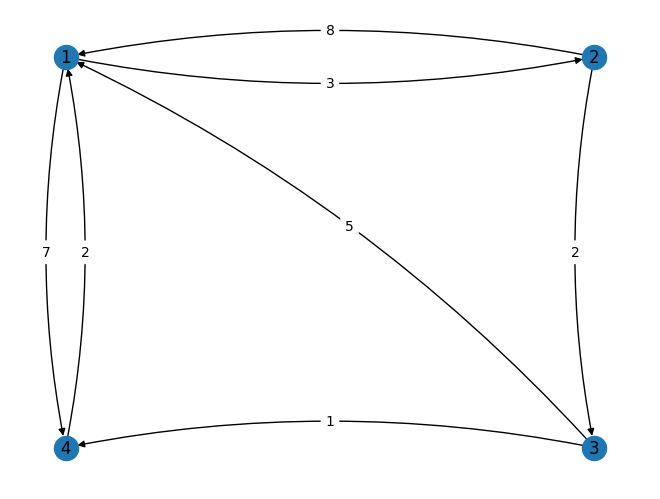

{(1, 2): 3, (1, 4): 7, (2, 1): 8, (2, 3): 2, (4, 1): 2, (3, 1): 5, (3, 4): 1}
[[0. 3. 5. 6.]
 [7. 0. 2. 3.]
 [3. 6. 0. 1.]
 [2. 5. 7. 0.]]


In [416]:
G = nx.DiGraph()
G.add_weighted_edges_from(((1,2,3), (1,4,7), (2,1,8), (2,3,2), (3,1,5), (3,4,1), (4,1,2)))

# Establim les posicions de cada node de forma que ens quedi un quadrat
pos = {1: [0,1], 2:[1,1], 3:[1,0], 4:[0,0]}

# Dibuixem els nodes i les arestes
nx.draw(G,pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

# Dibuixem els pesos
labels = nx.get_edge_attributes(G,'weight')
my_draw_networkx_edge_labels(G, pos, edge_labels=labels, rad=0.1, rotate=False)
plt.show()

id2index = {k: v for v, k in enumerate(sorted(G.nodes()))}
dist = floyd_wharsall(G, id2index)

print(dist)

## Camí Eulerià

Un __camí eulerià__ d'un Graf $G$ és un camí de $G$ que passa una única vegada per cada aresta. El problema dels camins eulerians va ser la base de tota la teoria de grafs i va ser postulat per Lehonard Euler en el famós problema de __els set ponts de Königsberg__. En aquest problema Euler es preguntava si podia creuar tots els ponts una sola vegada.

<table>
    <tr>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png" alt="Ponts de Konigsberg" style="width:300px"/>
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/9/96/K%C3%B6nigsberg_graph.svg" alt="Ponts de Konigsberg" style="width:300px"/>
        </td>
    </tr>
</table>

<div class="alert alert-success">
<h1>Problema 3</h1>
<p>
    Implementeu un algorisme que trobi un <b>camí eulerià</b>, si existeix, per a un graf <b>no dirigit</b> donat. Seguiu el següent procediment:
    <ol>
        <li> Comproveu que pot existir un camí. Quina condició han de complir els graus dels nodes?
        <li> Implementeu un <b>dfs per a les arestes</b>. En el moment en que no pugui continuar l'exploració (ja que totes les arestes d'un node ja han estat visitades), afegim el node en el camí a retornar. 
    </ol>
</p>    
        
</div>

In [417]:
def euler_path(G):
    """
    Calcula el camí eulerià d'un graf no dirigit
    
    Params
    ======
    :G: Un objecte de la classe nx.Graph
    
    Returns
    =======
    :path: El camí eulerià
    """
    path = []
    return path

[]

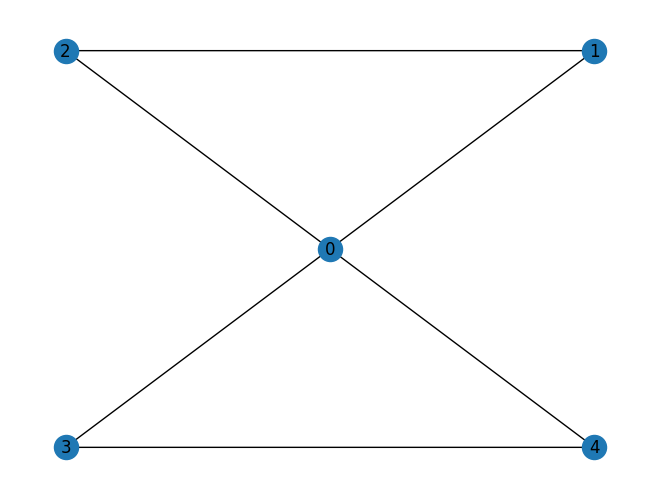

In [418]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0),(0,3),(3,4),(4,0)])
nx.draw_kamada_kawai(G, with_labels=True)
euler_path(G)

[]

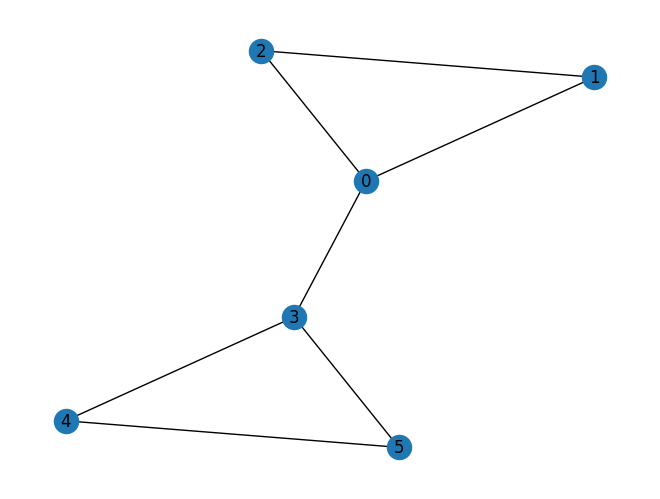

In [419]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0),(0,3),(3,4),(4,5),(5,3)])
nx.draw_kamada_kawai(G, with_labels=True)
euler_path(G)

[]

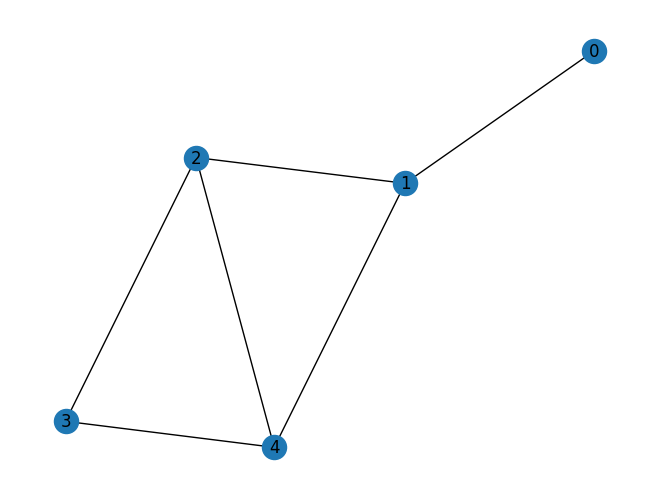

In [420]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,2),(4,1)])
nx.draw_kamada_kawai(G, with_labels=True)
euler_path(G)

## Circuit Eulerià

Un __circuit eulerià__ d'un graf $G$ és un camí de $G$ que passa una única vegada per cada aresta i que **té com a inici i fi el mateix node**. Observeu que tot circuit eulerià és també un camí eulerià però que el recíproc no és cert.

<div class="alert alert-success">
<h1>Problema 4</h1>
<p>
    Implementeu un algorisme que trobi un <b>circuit eulerià</b>, si existeix, per a un graf <b>no dirigit</b> donat.
</p>    
        
</div>

In [421]:
from random import choice
def euler_circuit(G):
    """
    Calcula el circuit eulerià d'un graf no dirigit
    
    Params
    ======
    :G: Un objecte de la classe nx.Graph
    
    Returns
    =======
    :path: El circuit eulerià
    """
    path = []
    return path

[]

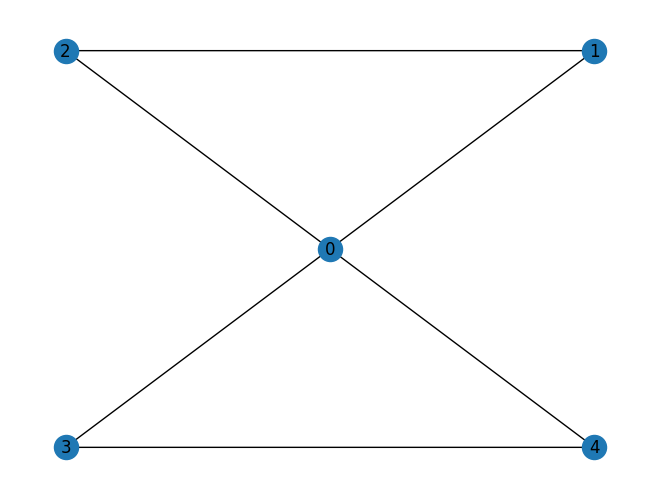

In [422]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0),(0,3),(3,4),(4,0)])
nx.draw_kamada_kawai(G, with_labels=True)
euler_circuit(G)

[]

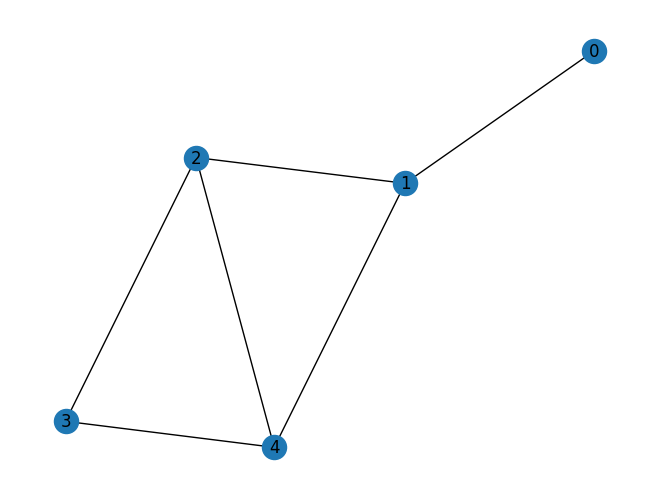

In [423]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,2),(4,1)])
nx.draw_kamada_kawai(G, with_labels=True)
euler_circuit(G)

[]

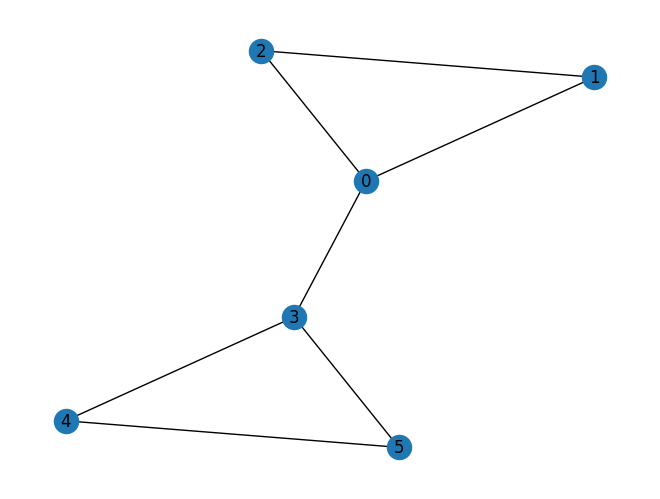

In [424]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0),(0,3),(3,4),(4,5),(5,3)])
nx.draw_kamada_kawai(G, with_labels=True)
euler_circuit(G)

<div class="alert alert-success">
<h1>Problema 5</h1>
<p>
    Implementeu funcions equivalents a les dels Problemes 3 i 4 considerant ara que teniu grafs dirigits.
</p>    
        
</div>

In [425]:
def euler_path_digraph(G):
    """
    Calcula el circuit eulerià d'un graf dirigit
    
    Params
    ======
    :G: Un objecte de la classe nx.DiGraph
    
    Returns
    =======
    :path: El camí eulerià
    """
    path = []
    return path

In [426]:
def euler_circuit_digraph(G):
    """
    Calcula el circuit eulerià d'un graf dirigit
    
    Params
    ======
    :G: Un objecte de la classe nx.DiGraph
    
    Returns
    =======
    :path: El circuit eulerià
    """
    path = []
    return path

[]
[]


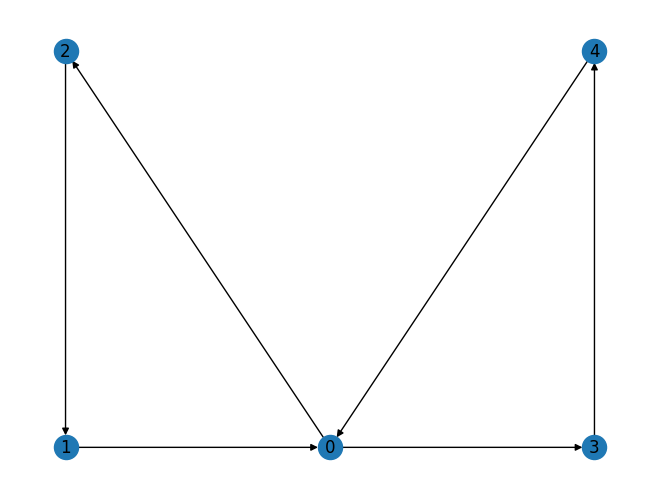

In [427]:
G = nx.DiGraph()

G.add_edges_from([(1,0),(0,3),(3,4),(4,0),(0,2),(2,1)])
pos = {0: (1,0), 1:(0,0), 2:(0,1), 3:(2,0), 4:(2,1)}
nx.draw(G, pos=pos, with_labels=True)

print(euler_circuit_digraph(G))
print(euler_path_digraph(G))

[]
[]


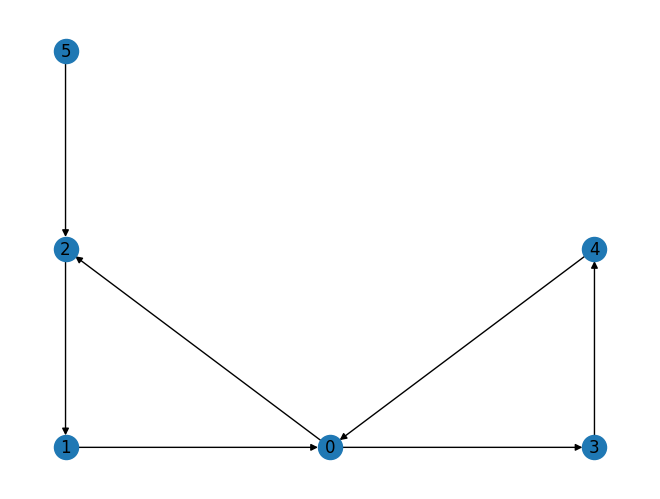

In [428]:
G = nx.DiGraph()

G.add_edges_from([(1,0),(0,3),(3,4),(4,0),(0,2),(2,1),(5,2)])
pos = {0: (1,0), 1:(0,0), 2:(0,1), 3:(2,0), 4:(2,1), 5:(0,2), 6:(2,2)}
nx.draw(G, pos=pos, with_labels=True)

print(euler_circuit_digraph(G))
print(euler_path_digraph(G))

[]
[]


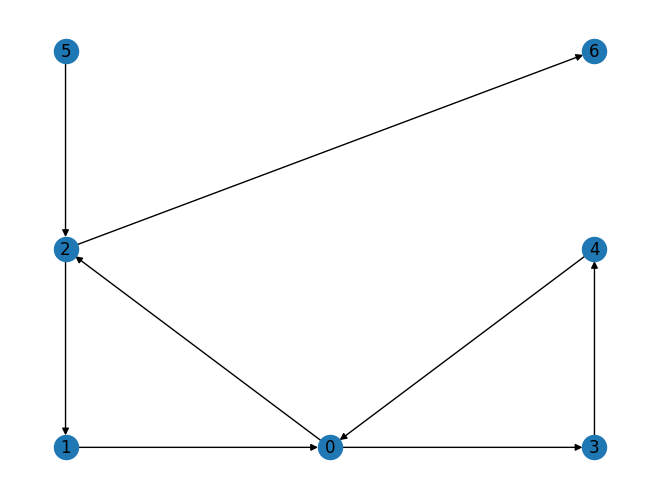

In [429]:
G = nx.DiGraph()

G.add_edges_from([(1,0),(0,3),(3,4),(4,0),(0,2),(2,1),(5,2),(2,6)])
pos = {0: (1,0), 1:(0,0), 2:(0,1), 3:(2,0), 4:(2,1), 5:(0,2), 6:(2,2)}
nx.draw(G, pos=pos, with_labels=True)

print(euler_circuit_digraph(G))
print(euler_path_digraph(G))

[]
[]


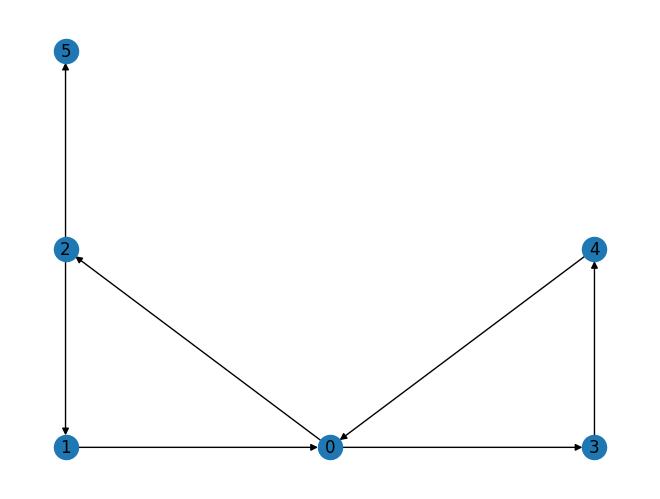

In [430]:
G = nx.DiGraph()

G.add_edges_from([(1,0),(0,3),(3,4),(4,0),(0,2),(2,1),(2,5)])
pos = {0: (1,0), 1:(0,0), 2:(0,1), 3:(2,0), 4:(2,1), 5:(0,2), 6:(2,2)}
nx.draw(G, pos=pos, with_labels=True)

print(euler_circuit_digraph(G))
print(euler_path_digraph(G))

<div class="alert alert-success">
<h1>Problema 6</h1>
<p>
    Considereu la següent planta d'un pis:<br>
    <img src='https://ssegui.github.io/algo2/classes/images/house.png' width=30% />
</p>    
    <ol>
        <li> Existeix un camí que passi exactament un cop per cada porta? En cas afirmatiu, quin és el recorregut que hem de seguir?
        <li> Existeix un camí que passi exactament un cop per cada porta començant i acabant a la mateixa habitació? En cas afirmatiu, quin és el recorregut que hem de seguir? A quines habitacions podem començar?
        <li> Existeix un camí que visiti totes les habitacions un sol cop? (No hem de passar necessàriament per a totes les portes).
    </ol>
    
Creeu un graf G utilitzant networkx que representi el plànol de la casa donat. Utilitzant les funcions dels exercicis anteriors, responeu a les preguntes.
        
</div>

[]

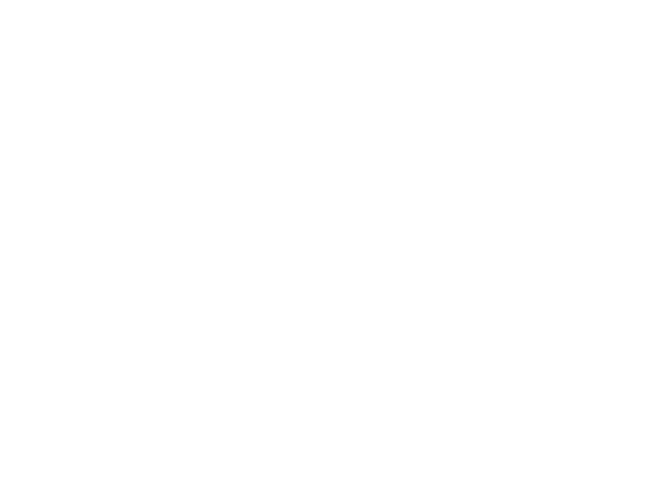

In [431]:
G = nx.Graph()
G.add_edges_from([])
pos = {0: (0,1), 1:(1,1), 2:(2,1), 3:(0,0), 4:(0.75,0), 5:(1.25,0), 6:(2,0)}
nx.draw(G, pos=pos, with_labels=True)
euler_path(G)

# Podem començar a les habitacions 4 i 5 (dues centrals de la part inferior) ja que tenen grau senar

In [432]:
euler_circuit(G)

[]